# PROBLEM 3.1

Rene L. Principe Jr. 
2015-04622

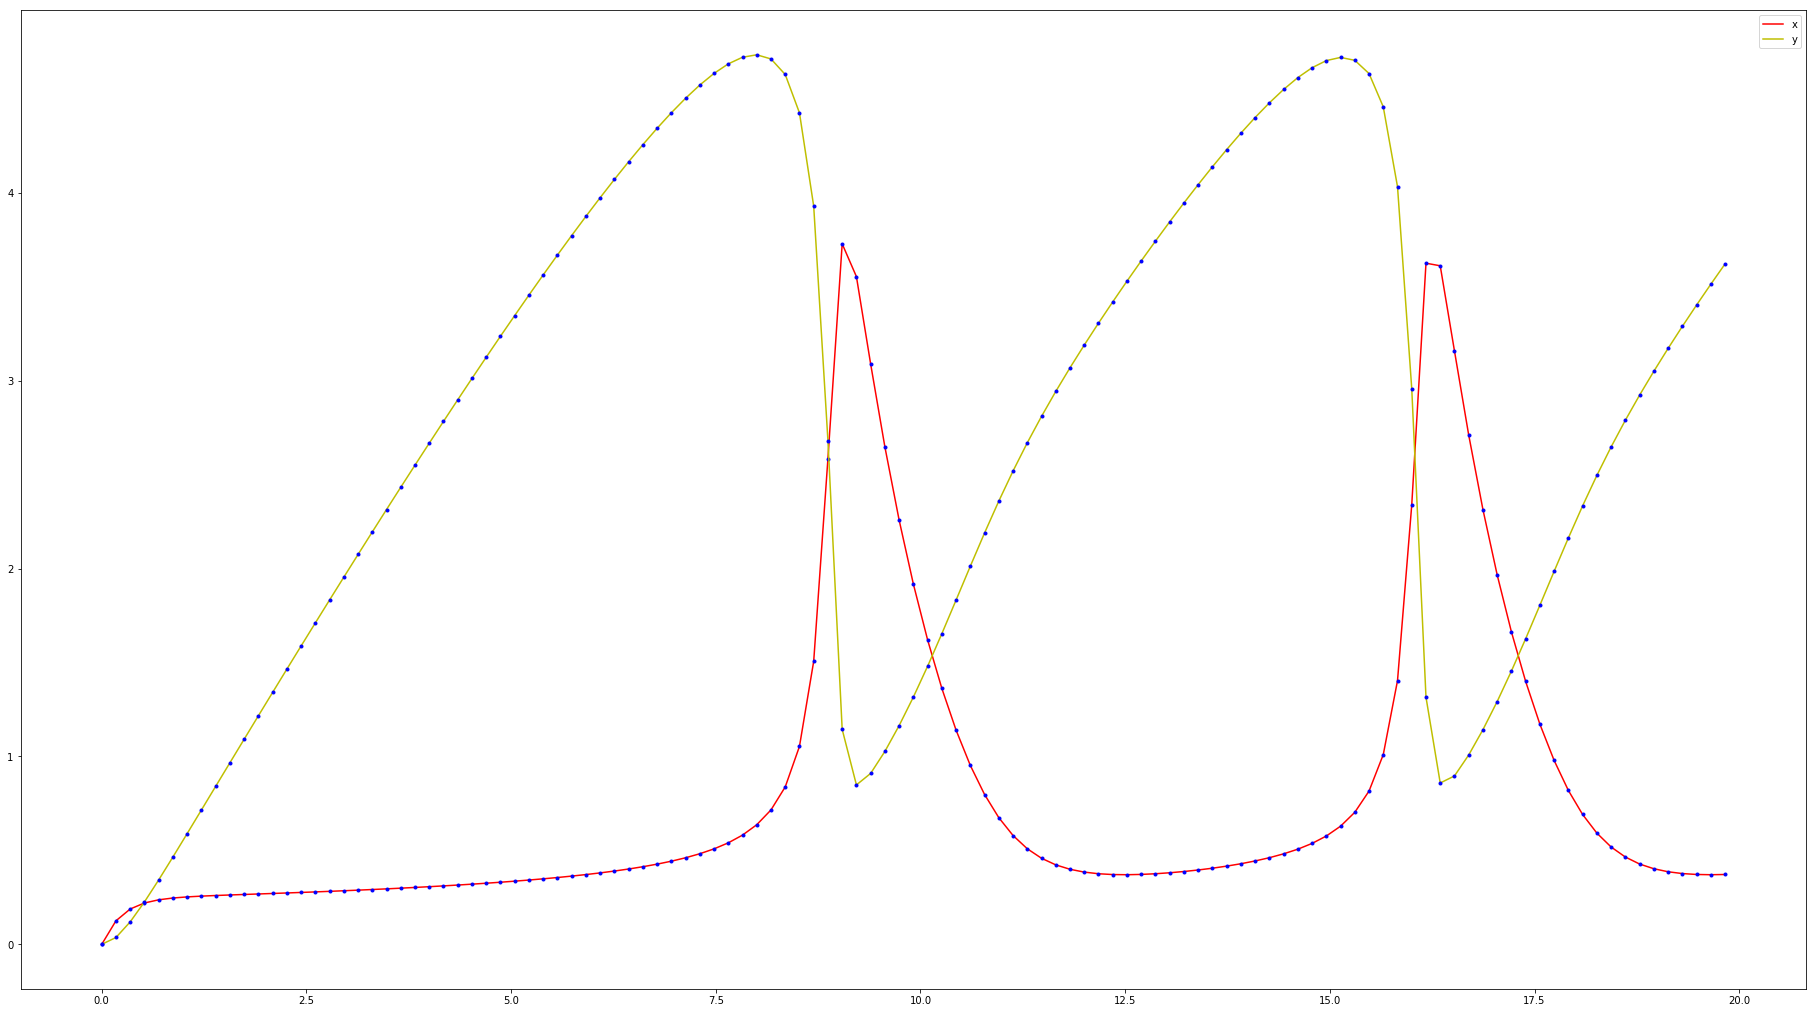

In [16]:
from math import sin,pi
from numpy import empty,array,arange
import matplotlib.pyplot as plt

a = 1.0
b = 3.0
N = 115       
H =  (20-0)/N     
delta = 1e-10     

def f(r):
    x = r[0]
    y = r[1]
    fx = 1-(b+1)*x+a*x**2*y
    fy = b*x-a*x**2*y
    return array([fx,fy],float)

tpoints = arange(0,20,H)
xpoints = []
ypoints = []
r = array([0.0,0.0],float)


for t in tpoints:

    xpoints.append(r[0])
    ypoints.append(r[1])

    n = 1
    r1 = r + 0.5*H*f(r)
    r2 = r + H*f(r1)

    R1 = empty([1,2],float)
    R1[0] = 0.5*(r1 + r2 + 0.5*H*f(r2))

    error = 2*H*delta
    while error>H*delta:

        n += 1
        h = H/n

        r1 = r + 0.5*h*f(r)
        r2 = r + h*f(r1)
        for i in range(n-1):
            r1 += h*f(r2)
            r2 += h*f(r1)

        R2 = R1
        R1 = empty([n,2],float)
        R1[0] = 0.5*(r1 + r2 + 0.5*h*f(r2))
        for m in range(1,n):
            epsilon = (R1[m-1]-R2[m-1])/((n/(n-1))**(2*m)-1)
            R1[m] = R1[m-1] + epsilon
        error = abs(epsilon[0])

    r = R1[n-1]

plt.plot(tpoints,xpoints, "r", label="x")
plt.plot(tpoints,xpoints,"b.")
plt.plot(tpoints,ypoints, "y", label="y")
plt.plot(tpoints,ypoints,"b.")
plt.rcParams["figure.figsize"] = [32,18]
plt.legend()
plt.show()


Modified the code (bulirsch.py) from the cpresources.